In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# To run this notebook on Google Colab, uncomment the following section of code.
#from google.colab import drive 
#drive.mount("/content/drive/")

#import os
#os.chdir("/content/drive/My Drive/DSECOP/Exploratory_Data_Analysis/")
#!pwd


# Preprocessing Techniques for Machine Learning

In this notebook, we will cover some common preprocessing techniques that can be applied to data before running a machine learning analysis. 

**Note**: *If you're not familiar with the concept of neural networks, you might want to check out the [Introduction to Deep Learning](https://github.com/GDS-Education-Community-of-Practice/DSECOP/tree/main/Intro_to_Deep_Learning) DSECOP module before doing this module!*

## The magic of neural networks: activation functions

Let's consider an individual neuron in a dense neural network. 

<p><a href="https://www.freecodecamp.org/news/deep-learning-neural-networks-explained-in-plain-english/">
<img src="https://drive.google.com/uc?export=view&id=15rBDNq0-AeuOsqnJaGpfqNnOTR6WhxLn" alt="drawing" width="600"/>
</a></p>

The neurons takes in a set of inputs $x_i$, which might be the input data or the output from another neuron. These inputs are multiplied by *weights* $w_i$ associated to that neuron. The sum-product $\sum_i w_i x_i$ is then added to a *bias* $b$, which is also associated to that neuron. Up to this point, the action of the neuron on the inputs is purely a *linear* function.



The real power of neural networks comes from the inclusion of *activation functions*. By sending the linear output of the neuron ($\sum_i w_i x_i + b$) through a *nonlinear* activation function, the expressivity and complexity of a neural network skyrockets. This nonlinearly allows us to use fewer layers of neurons, and fewer neurons overall.

Some activation functions are illustrated below.

<p><a href="https://www.v7labs.com/blog/neural-networks-activation-functions">
<img src="https://drive.google.com/uc?export=view&id=1wColODYw0efN8kUUcTiVTVh9bcyMARt-" alt="drawing" width="600"/>
</a></p>

Looking at some of these functions in more detail: the top left plot shows the "ReLU" activation function. Any neuron input that is negative is mapped to 0 by ReLU, and any input that is positive is mapped to itself. In this way, ReLU is able to "deactivate" negative neural inputs.

Looking at some of the activation functions, you might notice that the functions are most interesting when the horizontal axis values are close to zero. In practice, this means that to maximize our usage of the nonlinear powers of activation functions, we want to ensure that the linear inputs to the activation functions are close to 0. This is achieved in two ways:

(1) Ensure that all of the weights $w_i$ and biases $b$ are initialized close to zero. This is done automatically by most machine learning packages, so it's not something that the typical user will have to worry about.

(2) Ensure that the input data is close to 0. This step must be manually carried out by the user, and it is known as *preprocessing* data. 

---


## How can we get out input data close to 0?

*Preprocessing* refers to the process of transforming input data so that it is small, or close to 0. This stage needs to be done only once before beginning data analysis, but it is essential: attempting to train a neural network on data that hasn't been preprocessed can fail dramatically!

As an example: imagine that you want to train a neural network to [learn the equations of motion](https://github.com/GDS-Education-Community-of-Practice/DSECOP/tree/main/Solving_Differential_Equations_with_NNs) that govern a ball falling off a cliff. You have set of input data that contains:

- a list of times that you took measurements at, ranging from 0 to 20 seconds.
- a list of the heights of the ball at each time you took a measurement, ranging from 0 to 20 meters.

If you were to use these time - height measurements as inputs to a neural network without any preprocessing, the outputs of the neurons would larger than the "active" region of the activation functions. So you'd want to first preprocess your data to get it somewhere in the range of -1 to 1.


---

## Choosing a preprocessing scheme

Selecting a data preprocessing scheme is both an art and a science: given a dataset, there's no a priori answer for which scheme will be best-suited. (However, by spending lots of time coding and training neural networks, you'll probably be able to get an intuition for what schemes are *not* well-suited to your data!) 

It's best to know a few different types of preprocessing algorithms, as well as their pros and cons. In practice, you might need to try 2-3 types of preprocessing schemes to find the one that produces the best-performing network.

For the rest of the notebook, we'll take a look at the most commonly used preprocessing schemes in greater detail. 

---

## Minmax scaling

Minmax scaling is a *linear* preprocessing technique. The goal is to reshift and rescale data such that it lies fully within a specified interval (typically [0, 1] or [-1, 1]).

To formalize this transformation: say we have an unprocessed dataset of $N$ points, $x_{i}$ for $i = 1, 2, ... N$. We want to generate a preprocessed dataset $y_i$ that lies fully within the bounded internal $[a, b]$. For this linear technique, this means that we want to find a transformation of the form 

$$ y_i = mx_i + c.$$

The original dataset has a minimum $x_\mathrm{min}$ and a maximum $x_\mathrm{max}$. To find the linear transformation, we need to solve the simultaneous equations

$$b = m x_\mathrm{max} + c$$
$$a = m x_\mathrm{min} + c$$

for $m$ and $c$.

Then the transformed data $y_i$ is given by

$$ y_i = \frac{b-a}{x_\mathrm{max} - x_\mathrm{min}} (x_i - \frac{x_\mathrm{max} + x_\mathrm{min}}{2}) + \frac{b + a}{2}.$$

**Activity:** On a separate sheet of paper, derive this equation for the transformed data $y_i$. 

### When might you want to use minmax scaling?

- Because minmax scaling maps data to a finite interval, it's useful when the **input data is also bounded**. As an example, most images store the colors for each pixel as an integer between 0 and 255, so they would be well-suited to minmax scaling

- In some cases, the **mean of a dataset is not a useful quantity**. For example, the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database)  of handwriten numbers is roughly binary: pixels are either black or white. For this dataset, the endpoints of the pixel range are more useful to know that the mean pixel value of each image, so a mean-based preprocessor (such as standard scaling) might be less useful. 

 <p>
<img src="https://drive.google.com/uc?export=view&id=18nHrZgdxZhAS8KVc4OhmLbfUbGMzmM7f" alt="drawing" width="300"/>
</a></p>

**Activity**: Write a function to minmax scale a 1-dimensional array of data.

In [2]:
def min_max_scale(data, a, b):

  mean_x = np.mean([np.min(data), np.max(data)])
  mean_target = np.mean([a, b])

  return (data - mean_x)*(b - a)/(np.max(data) - np.min(data)) + mean_target


Now let's see how this function changes some data.

**Activity**: Apply your function to the three datasets given below (`normal_data`, `binary_data`, and `outliers_data`) to minmax scale each set to the interval [-3, -3]. Using the helper plotting code, create a histogram of the data before and after applying the minmax scaling function.



In [3]:
#@title Helper plotting code

num_data_points = 10000
num_outliers = 1000

normal_data = np.random.normal(loc = 4, scale = 2, size = (num_data_points, 1))
binary_data = np.concatenate((np.random.normal(loc = -2, scale = 1, size = (int(num_data_points/2), 1)),np.random.normal(loc = 3, scale = 1, size = (int(num_data_points/2), 1))))
outliers_data = np.concatenate((np.random.normal(loc = -1, scale = 1, size = (num_data_points, 1)),np.random.uniform(-5, 8, size = (num_outliers, 1))))

def plot_data(data, preprocessed_data, title):

  bins_data = np.linspace(np.min(data), np.max(data), 40)
  bins_preproc_data = np.linspace(np.min(preprocessed_data), np.max(preprocessed_data), 40)

  plt.figure()
  plt.hist(data, bins = bins_data, label = "Raw data", histtype = "step")
  plt.hist(preprocessed_data, bins = bins_preproc_data, label = "Processed data", histtype = "step")
  plt.legend()
  plt.xlim((np.min([bins_data[0], bins_preproc_data[0]]) - .5,np.max([bins_data[-1], bins_preproc_data[-1]]) + .5))
  plt.title(f"{title} distributed data")
  plt.show()

(10000, 1)


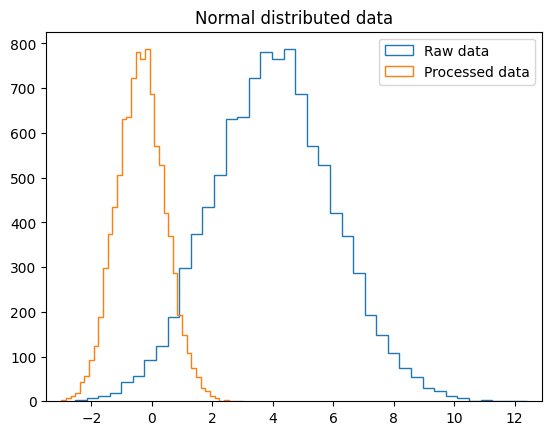

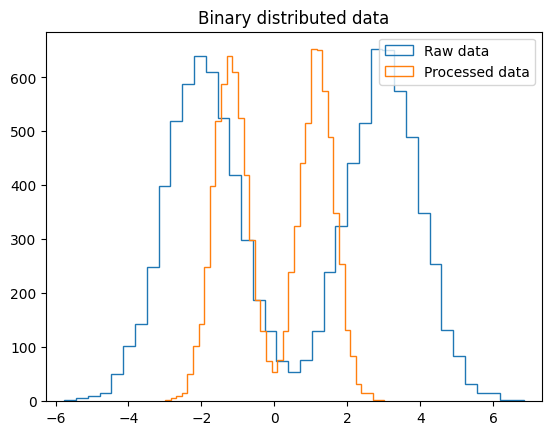

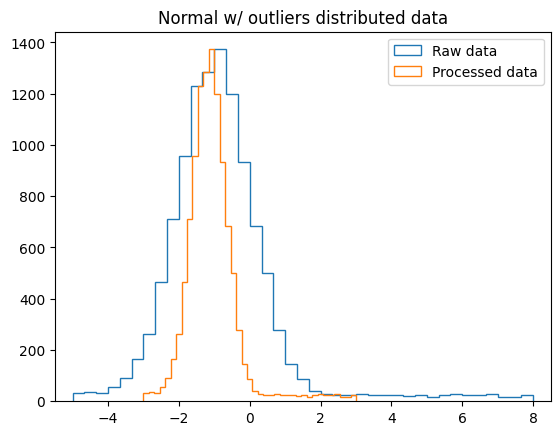

In [4]:
a = -3
b = 3

print(normal_data.shape)
plot_data(normal_data, min_max_scale(normal_data, a, b), "Normal")

plot_data(binary_data, min_max_scale(binary_data, a, b), "Binary")

plot_data(outliers_data, min_max_scale(outliers_data, a, b), "Normal w/ outliers")

### Built-in functions for minmax scaling

In practice, it is better to use built-in functions to preprocess data. Such functions have been optimized to be fast and robust, which is a necessity when working with large datasets. 

The vast majority of code you will see makes use the [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module. When using `sklearn`, preprocessing takes three steps:

(1) *Define* the preprocessor, `preprocessor = sklearn.preprocessing.Preprocessor_Type`

(2) *Fit* the preprocessor to the dataset that you're using, `preprocessor.fit(data)`

(3) *Transform* the data using your fit preprocessor, `preprocessed_data = preprocessor.transform(data)`.

**Activity**: Use
`sklearn.preprocessing.MinMaxScaler` to preprocess the three given datasets. You might find the corresonding [`MinMaxScaler` page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) helpful. 

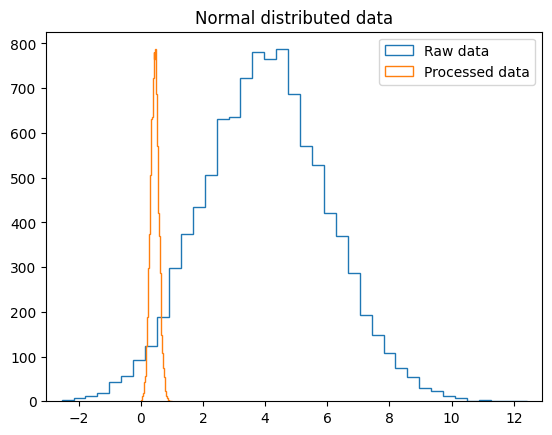

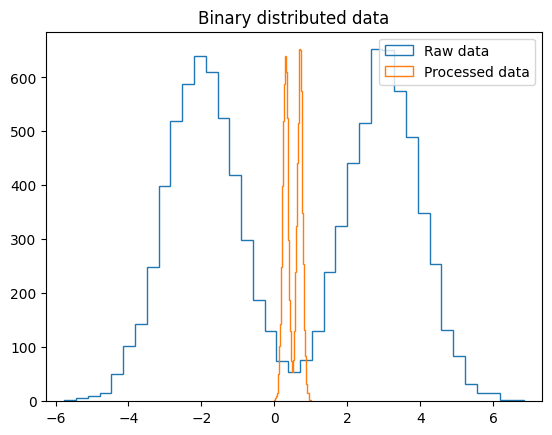

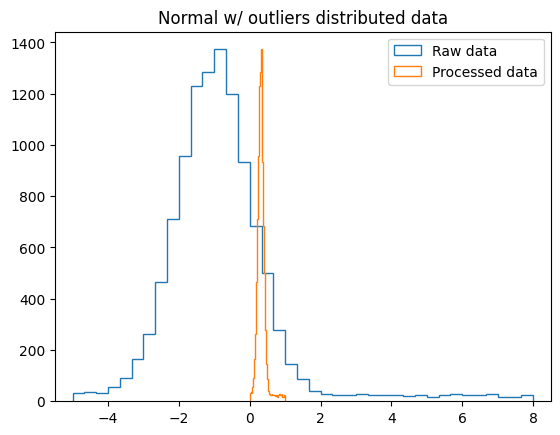

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(normal_data)
sk_normal_data = scaler.transform(normal_data)
plot_data(normal_data, sk_normal_data, "Normal")

scaler = MinMaxScaler()
scaler.fit(binary_data)
sk_bin_data = scaler.transform(binary_data)
plot_data(binary_data, sk_bin_data, "Binary")

scaler = MinMaxScaler()
scaler.fit(outliers_data)
sk_out_data = scaler.transform(outliers_data)
plot_data(outliers_data, sk_out_data, "Normal w/ outliers")



---


## Standard Scaling

Standard Scaling is another linear preprocessing technique. For this technique, the goal is to transform the data so that it has zero mean and unit standard deviation. 

Going back to our data sample $x_i$: we can calculate the sample mean $\mu = \frac{1}{N}\sum_{i = 1}^N x_i$ and sample standard deviation $\sigma = \frac{1}{N}\sum_{i = 1}^N (x_i - \mu)^2$. Then the transformed data $y_i$ is given by

$$ y_i = \frac{x_i - \mu}{\sigma}.$$

### When might you want to use standard scaling?

- When a dataset is **roughly clustered about a mean value**, it can make sense to express the data in terms of its distance from that mean. Standard scaling is especially good for data that is **symmetric about this mean**. 

- If a dataset is **not tightly bounded**, standard scaling might provide a more intuitive transformation than minmax scaling.



**Activity**: Write a function to standard scale a 1-dimensional array of data. Apply your function to the three datasets given. Using the helper plotting code, create histograms of the data before and after applying the standard scaling function.

In [6]:
def standard_scale(data):

  mean = np.mean(data)
  std = np.std(data)

  return (data - mean) / std


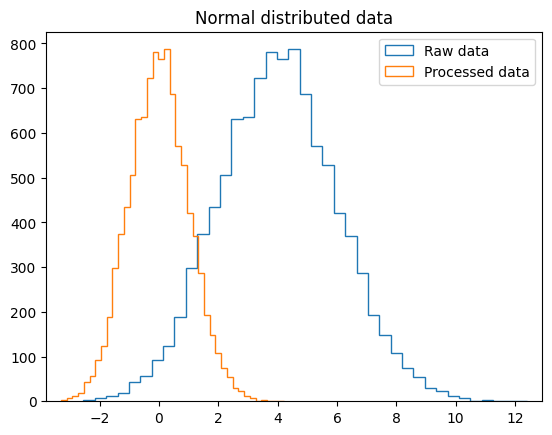

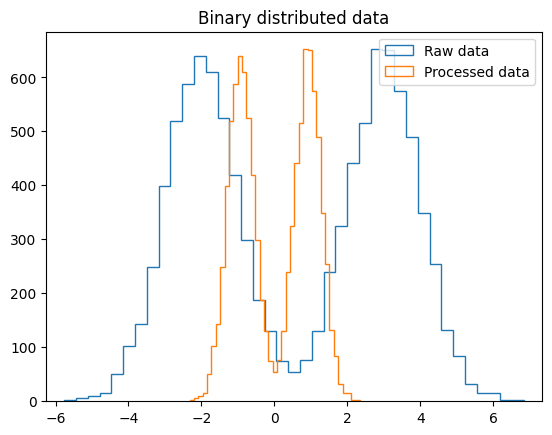

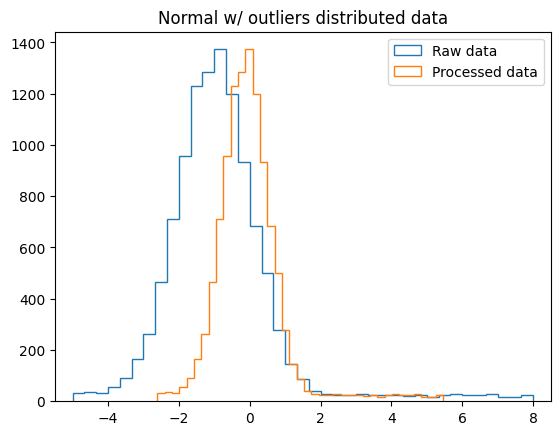

In [7]:

plot_data(normal_data, standard_scale(normal_data), "Normal")

plot_data(binary_data, standard_scale(binary_data), "Binary")

plot_data(outliers_data, standard_scale(outliers_data), "Normal w/ outliers")


**Activity**: Use
`sklearn.preprocessing.StandardScaler` to preprocess the three given datasets. You might find the corresonding [`StandardScaler` page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) helpful. 

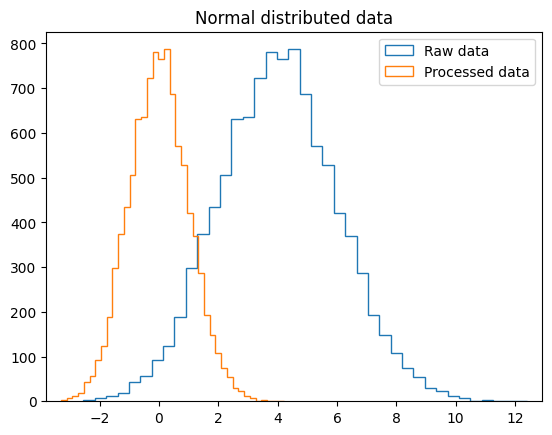

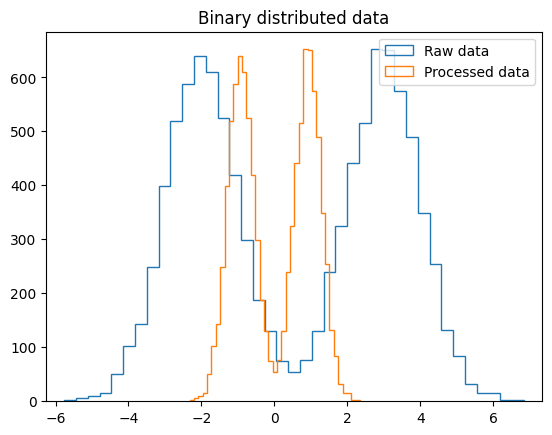

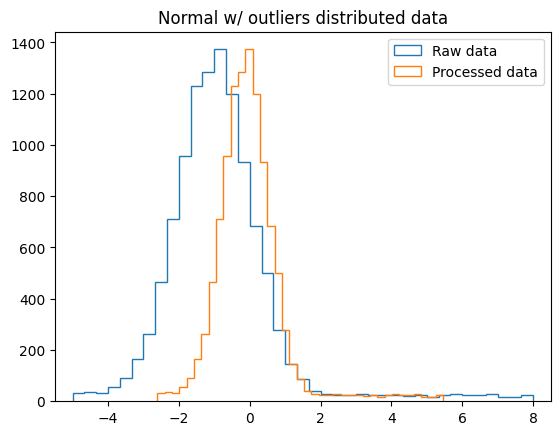

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(normal_data)
sk_normal_data = scaler.transform(normal_data)
plot_data(normal_data, sk_normal_data, "Normal")

scaler = StandardScaler()
scaler.fit(binary_data)
sk_bin_data = scaler.transform(binary_data)
plot_data(binary_data, sk_bin_data, "Binary")

scaler = StandardScaler()
scaler.fit(outliers_data)
sk_out_data = scaler.transform(outliers_data)
plot_data(outliers_data, sk_out_data, "Normal w/ outliers")



---

## Robust scaling

Robust scaling is yet another linear preprocessing technique. It's very similar to standard scaling, but it can be more useful when the dataset contains outliers that influence the mean in undesireable ways. 

Going back to our data sample $x_i$, we define the transformation as: 

$$ y_i = \frac{x_i - \mathrm{median}(x)}{q_3 - q_1}.$$

This looks very similar to the one for standard scaling, but we've replaced the mean $\mu$ of the dataset with the median, and the standard deviation $\sigma$ with the difference between the 3rd and 1st quartiles, $q_3$ and $q_1$. (Recall that the first quartiles is defined to be *greater* than exactly 25% of the data, and the third quartiles is defined to be *less* than exactly 25% of the data.)

<p><a href="https://www.scribbr.com/statistics/quartiles-quantiles/">
<img src="https://drive.google.com/uc?export=view&id=1IZ_hOYWwOGueiM_VlG3-CJqapi36f55t" alt="drawing" width="500"/>
</a></p>

"Robust" has a technical definition here: it refers to the preprocessing being less influenced by outliers. 



### When might you want to use robust scaling?

- As stated earlier, when a **dataset contains a large number of outliers**, these outliers can bias the mean and the standard deviation. In this case, we'd want to use a preprocessing method that is based on quantities that don't change significantly due to the outleirs. In this way, attention is focused on the data points that are *not* outliers.   


<p><a href="https://scikit-learn.org/0.18/auto_examples/preprocessing/plot_robust_scaling.html#sphx-glr-auto-examples-preprocessing-plot-robust-scaling-py">
<img src="https://drive.google.com/uc?export=view&id=1sB4WM7kwNzx1sD5p_GQTmEgRB7oDV5ul" alt="drawing" width="500"/>
</a></p>




**Activity**: Write a function to robust scale a 1-dimensional array of data. Apply your function to the three datasets given. Using the helper plotting code, create histograms of the data before and after applying the robust scaling function.

Do *not* use built-in functions to calculate the median or the quartiles. 


In [9]:
def robust_scale(data):

  sorted_data = np.sort(data, axis = 0)

  # get median
  med_index = 0.5*data.shape[0]
  if int(med_index) == med_index:
    median = 0.5*(sorted_data[int(med_index)] + sorted_data[int(med_index) + 1])
  else: 
    median = sorted_data[int(med_index) + 1]

  # get first quantile
  first_index = 0.25*data.shape[0]
  if int(first_index) == first_index:
    first_quantile = 0.5*(sorted_data[int(first_index)] + sorted_data[int(first_index) + 1])
  else: 
    first_quantile = sorted_data[int(first_index) + 1]

  # get third_quantile
  third_index = 0.75*data.shape[0]
  if int(third_index) == third_index:
    third_quantile = 0.5*(sorted_data[int(third_index)] + sorted_data[int(third_index) + 1])
  else: 
    third_quantile = sorted_data[int(third_index) + 1]

  return (data - median) / (third_quantile - first_quantile)




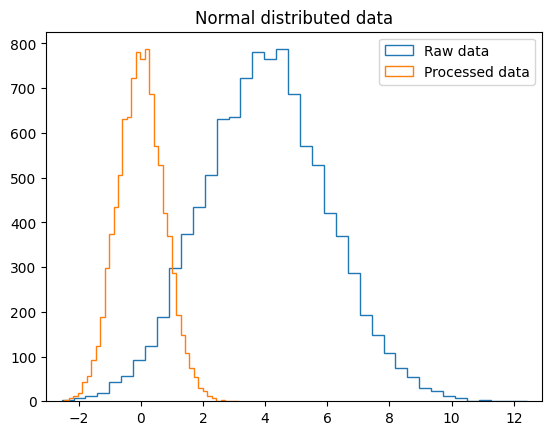

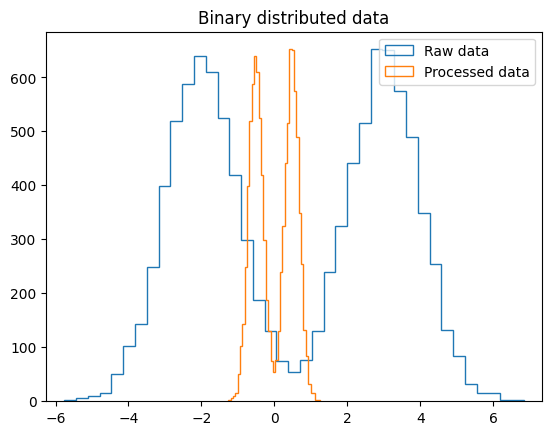

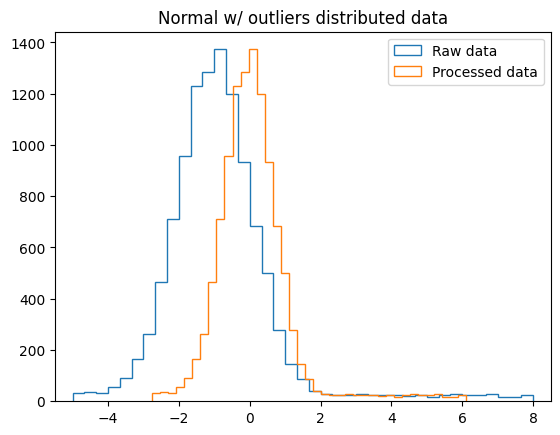

In [10]:

plot_data(normal_data, robust_scale(normal_data), "Normal")

plot_data(binary_data, robust_scale(binary_data), "Binary")

plot_data(outliers_data, robust_scale(outliers_data), "Normal w/ outliers")

**Activity**: Use
`sklearn.preprocessing.RobustScaler` to preprocess the three given datasets. You might find the corresonding [`RobustScaler` page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) helpful. 

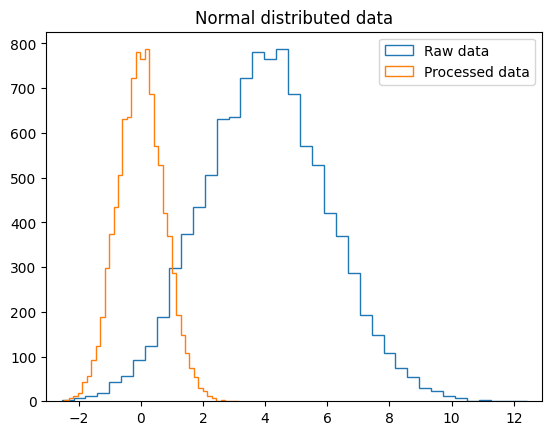

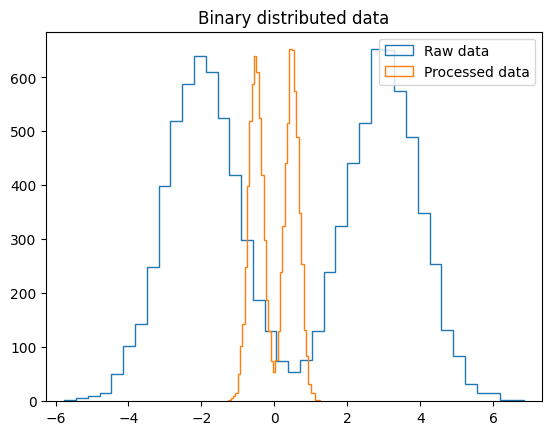

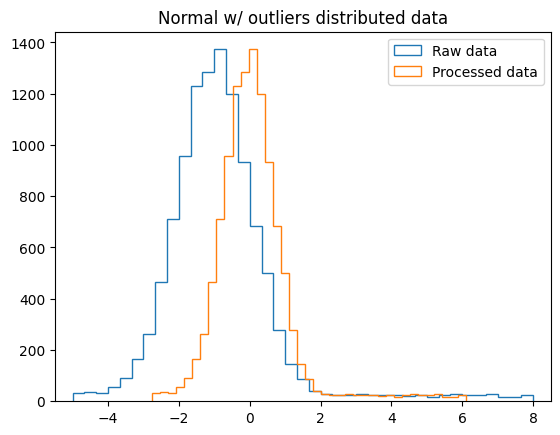

In [11]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(normal_data)
sk_normal_data = scaler.transform(normal_data)
plot_data(normal_data, sk_normal_data, "Normal")

scaler = RobustScaler()
scaler.fit(binary_data)
sk_bin_data = scaler.transform(binary_data)
plot_data(binary_data, sk_bin_data, "Binary")

scaler = RobustScaler()
scaler.fit(outliers_data)
sk_out_data = scaler.transform(outliers_data)
plot_data(outliers_data, sk_out_data, "Normal w/ outliers")




---


## The quantile transformation

The quantile transformation is a *nonlinear* preprocessing technique. It's based on the *quantile* function for probability distributions. However, let's first refresh ourselves on *quantles*. 


### Quantiles to divide datasets

Quantiles are points that divide a dataset into equal proportions. When we split a dataset into $k$ *quantiles*, this means that we're defining adjacent, continuous regions of the dataset that each contain $\frac{100}{k}$% of the data. If we consider a 1-dimensional dataset that takes values on the real line, then quantiles allow us to define points on the line $q_i$ that partition the dataset into $k$ equal parts. 

You may be familiar with the *quartiles*, which divide a dataset into four equal chunks. The first quartile, $q_1$, is the point below which 25% of the data lies. The third quartile, $q_3$, is the point below which 75% of the data lies, or the point above which 25% of the data lies. The second quartile has a more familiar name: the *median*!. 

Quantiles represent a generalization of quartiles. Some of the more common quantiles have $q$ = 10 (*deciles*) and $q = 100$ (*percentiles*). 



### The quantile function for probabilities. 

Let's slightly reframe this quantile picture. Consider a dataset division into $k$ quantile chunks, with quantiles $q_1$, ..., $q_{k-1}$. The $q_i$ quantile represents the value below which ($\frac{100}{k} \times i$)% of the data lies. In other words, the probability that a given data point is less than the value $q_i$ is $$P(x < q_i) = \frac{i}{k}.$$

But this probability has another name -- it's the *cumulative distribution function* (CDF), $F(q_i)$, of the dataset.

We define the *quantile function* $Q$ as the inverse of the CDF, $Q(p) = F^{-1}(p)$. This function is a mapping from the interval [0, 1] to the range of the dataset. So if we wanted to know the point below which 42% of our data was, we would simply need to calculate $Q(0.42)$. 


### Using the quantile function to preprocess data

To use the quantile function as a preprocessing mechanism, it is necessary to know the CDF $F(x)$ of the data distribution. This is rarely known analytically, so it must be estimated numerically (as a result, it's quite a difficult talk to code the quantile transformation by hand!).

Next, we make use of the [Probability Integral Transformation](https://matthewfeickert.github.io/Statistics-Notes/notebooks/Introductory/probability-integral-transform.html). This is a theorem that states that if we have a dataset with points $x_i$, then the variables $u_i = F(x_i)$ are uniformly distributed (where $F$ is the CDF of the dataset). So by applying the dataset's CDF to the dataset itself, we can map our dataset to a set of uniformly distributed variables. 

Variations of the quantile preprocessor exist that take the resulting uniform distribution and map it to others (most commonly the normal distribution). 

### When might you want to use quantile preprocessing?

- Like with the robust scaler, the quantile distribution is **more resistant to outliers**. 
- A large number of **machine learning tools work best on data that is normally distributed**. The quantile transformation allows us to tranform *any* distribution to a normal one. 

**Activity**: Write a function to quantile preprocess a *normally distributed* dataset. Let the mean and standard deviation be arbitrary. 

In [12]:
from scipy.stats import norm

def toy_quantile(data):

  # calculate the mean and standard deviation of the dataset
  mean = np.mean(data)
  std = np.std(data)

  processed_data = []

  # define the cdf
  def cdf_func(x):
    return norm.cdf(x, loc = mean, scale = std)

  for data_point in data:
    processed_data.append(cdf_func(data_point))

  return np.array(processed_data)


Activity: Apply your function to the three datasets given. Using the helper plotting code, create a histogram of the data before and after applying the minmax scaling function.

*Note:* Your quantile should *fail* for the datasets that are not normally distributed, because it used the cdf of a normal distribution. 

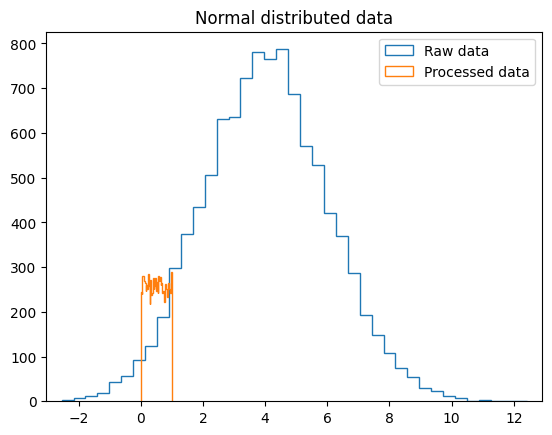

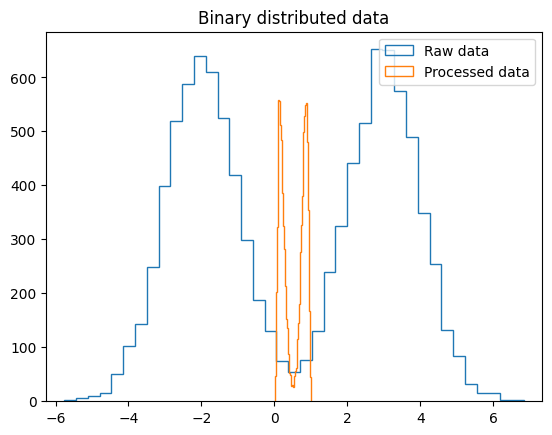

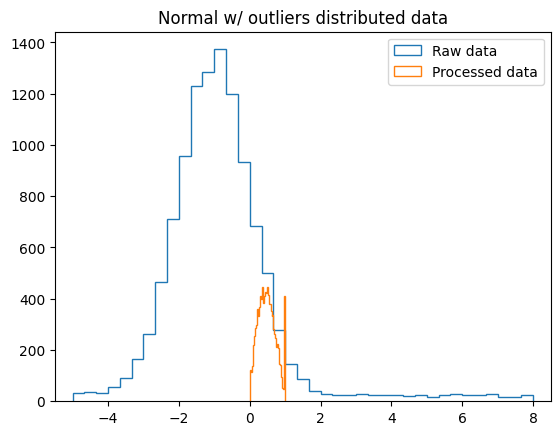

In [13]:

plot_data(normal_data, toy_quantile(normal_data), "Normal")

plot_data(binary_data, toy_quantile(binary_data), "Binary")

plot_data(outliers_data, toy_quantile(outliers_data), "Normal w/ outliers")

**Activity**: Use
`sklearn.preprocessing.QuantileTransformer` to preprocess the three given datasets. You can play around with `n_quantiles`, which is a gauge for the degree of precision `sklearn` uses to estimate the CDF. (The default value is 1000.) You might find the corresonding [`QuantileTransformer` page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer) helpful. 

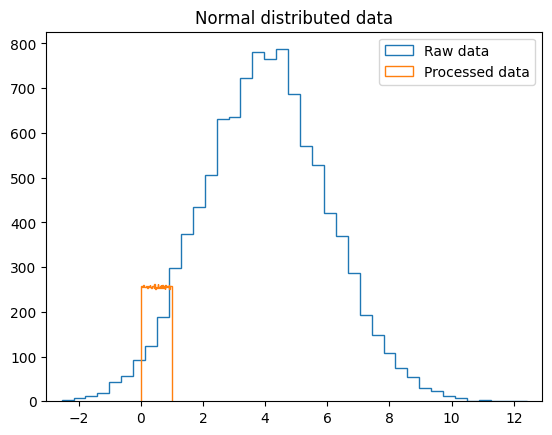

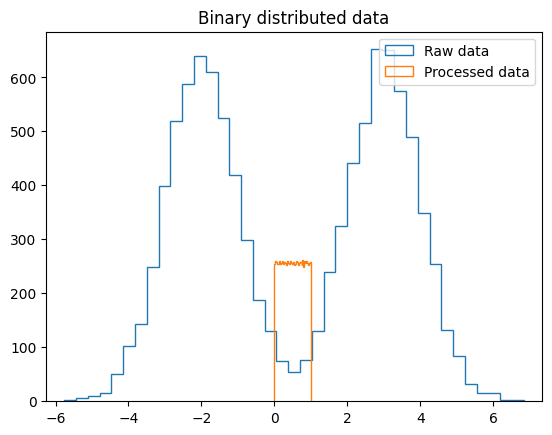

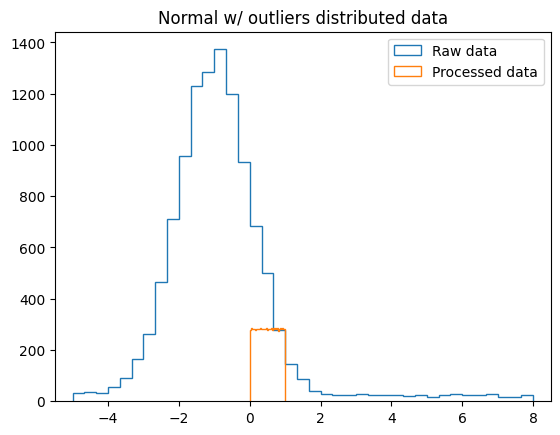

In [14]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(n_quantiles = 500)
scaler.fit(normal_data)
sk_normal_data = scaler.transform(normal_data)
plot_data(normal_data, sk_normal_data, "Normal")

scaler = QuantileTransformer(n_quantiles = 500)
scaler.fit(binary_data)
sk_bin_data = scaler.transform(binary_data)
plot_data(binary_data, sk_bin_data, "Binary")

scaler = QuantileTransformer(n_quantiles = 500)
scaler.fit(outliers_data)
sk_out_data = scaler.transform(outliers_data)
plot_data(outliers_data, sk_out_data, "Normal w/ outliers")



*End of notebook 02*

---


In [ ]:
 s